In [1]:
import wg1template

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import wg1template.histogram_plots as wg1
import wg1template.point_plots as points
from wg1template.plot_style import TangoColors
from wg1template.plot_utilities import export

In [3]:
from root_pandas import read_root

import pandas as pd

Welcome to JupyROOT 6.20/04


In [4]:
uu = read_root('uubarContinuumSuppression.root')
dd = read_root('ddbarContinuumSuppression.root')
ss = read_root('ssbarContinuumSuppression.root')

signal = read_root('B+_hadronic_50.root')


In [5]:
dummy_var = wg1.HistVariable("DummyVariable",
                             n_bins=25,
                             scope=(-0,10),
                             var_name="DummyVariable",
                             unit="GeV")


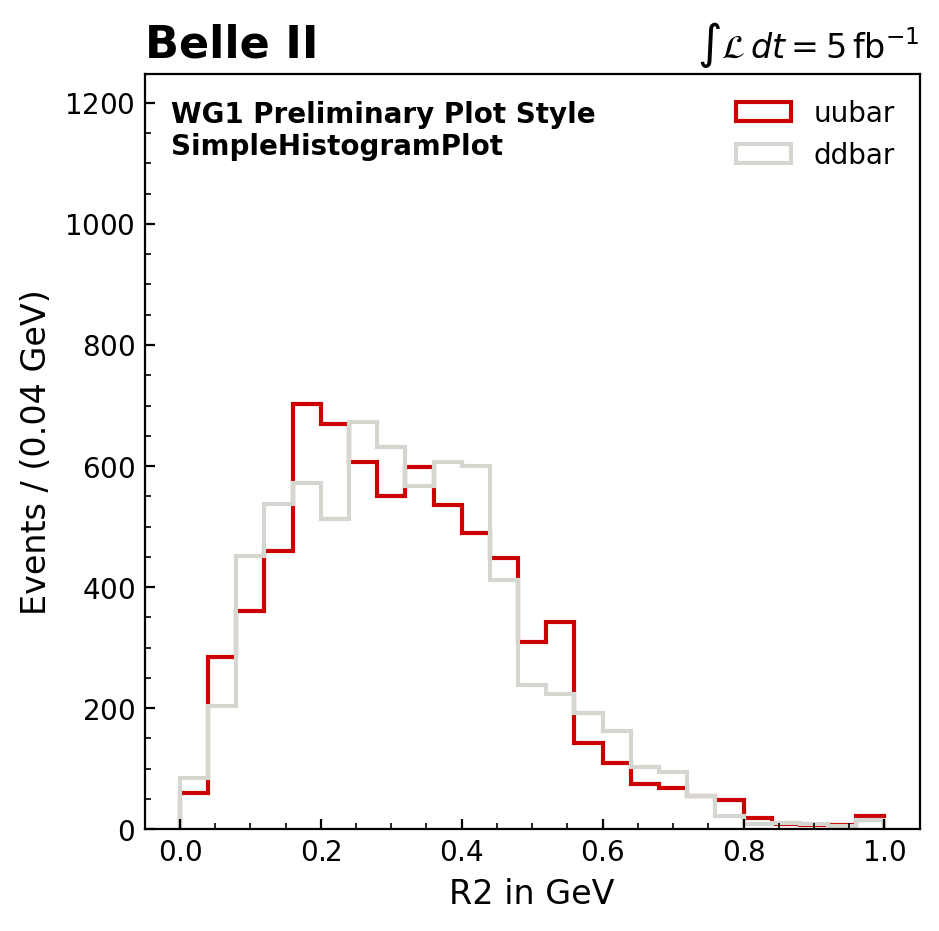

In [6]:
hp1 = wg1.SimpleHistogramPlot(dummy_var)
hp1.add_component("uubar", uu, color=TangoColors.scarlet_red)
hp2 = wg1.SimpleHistogramPlot(dummy_var)
hp2.add_component("ddbar", dd, color=TangoColors.aluminium)
fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Events")
hp2.plot_on(ax)
wg1.add_descriptions_to_plot(
    ax,
    experiment='Belle II',
    luminosity=r"$\int \mathcal{L} \,dt=5\,\mathrm{fb}^{-1}$",
    additional_info='WG1 Preliminary Plot Style\nSimpleHistogramPlot'
)
plt.show()
export(fig, 'simple', 'examples')
plt.close()

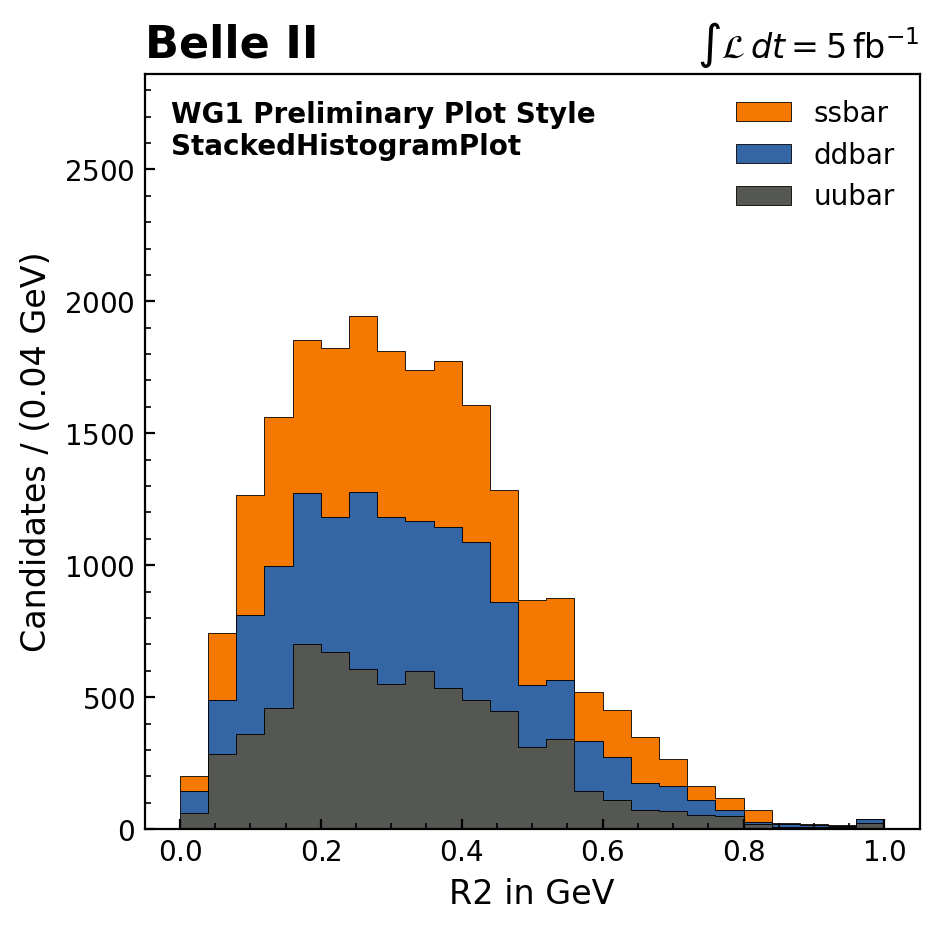

In [7]:
hp = wg1.StackedHistogramPlot(dummy_var)
hp.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                 comp_type='stacked')
hp.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                 comp_type='stacked')
hp.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange, comp_type='stacked')
fig, ax = wg1.create_solo_figure()
hp.plot_on(ax, ylabel="Candidates")
wg1.add_descriptions_to_plot(
    ax,
    experiment='Belle II',
    luminosity=r"$\int \mathcal{L} \,dt=5\,\mathrm{fb}^{-1}$",
    additional_info='WG1 Preliminary Plot Style\nStackedHistogramPlot'
)
plt.show()
export(fig, 'stacked', 'examples')
plt.close()

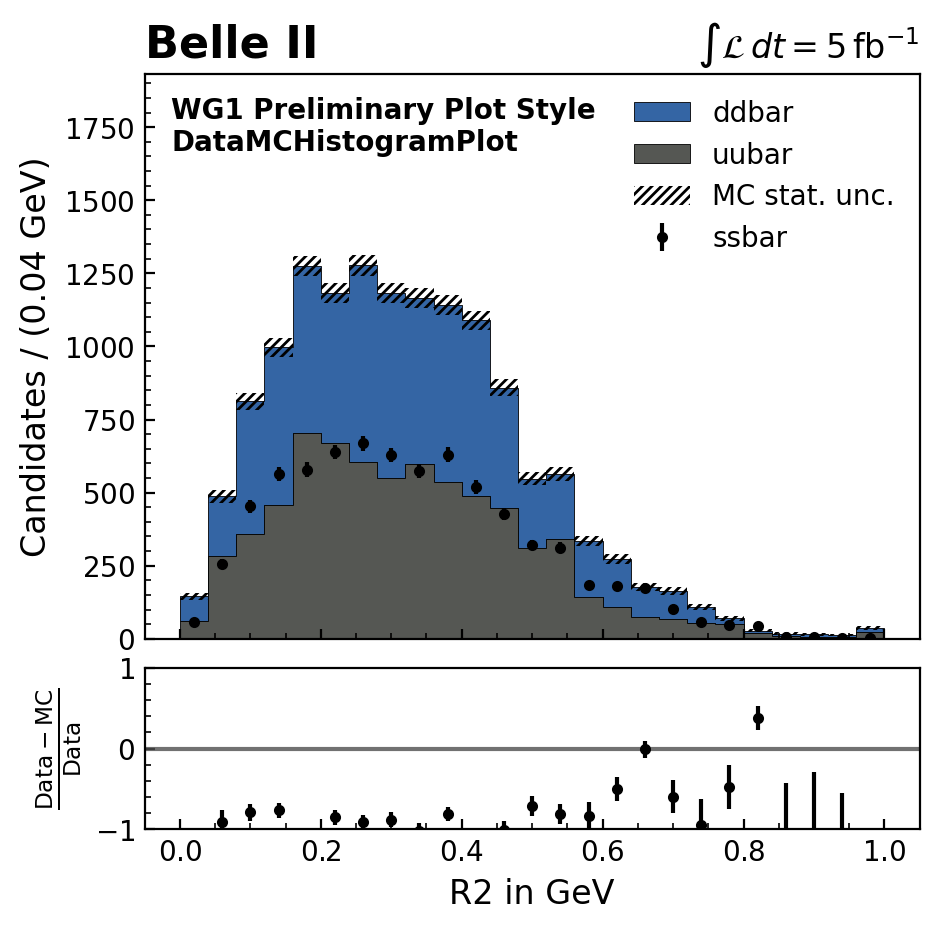

In [8]:
hp = wg1.DataMCHistogramPlot(dummy_var)
hp.add_mc_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate)
hp.add_mc_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue)
hp.add_data_component("ssbar", ss)
fig, ax = wg1.create_hist_ratio_figure()
hp.plot_on(ax[0], ax[1], style="stacked", ylabel="Candidates")
wg1.add_descriptions_to_plot(
    ax[0],
    experiment='Belle II',
    luminosity=r"$\int \mathcal{L} \,dt=5\,\mathrm{fb}^{-1}$",
    additional_info='WG1 Preliminary Plot Style\nDataMCHistogramPlot'
)
plt.show()
export(fig, 'data-mc', 'examples')
plt.close()

In [9]:
# Make some pre-binned data
def mockup_bin_yields(mean, stdev, nPoints, bins, scope):
    ss = np.random.normal(mean, stdev, nPoints)

    bin_yields, _ = np.histogram(ss, bins=bins, range=scope)
    return bin_yields


scope = (-4, 6)
n_bins = 40

uu_yields = mockup_bin_yields(0, 10, 3200, n_bins, scope)
dd_yields = mockup_bin_yields(2, 1, 1600, n_bins, scope)

ss = np.concatenate([
    np.random.normal(0, 10, 3200),
    np.random.normal(2, 1, 1600),
    np.random.normal(1, 0.4, 800),
])

# Make up some uniform bin yield uncertainties
bin_uncertainties = 6*np.ones(n_bins)

# Variable must have the same binning as the histogram bin values
dummy_var = wg1.HistVariable("R2",
                             n_bins=n_bins,
                             scope=scope,
                             var_name="R2",
                             unit="GeV")

In [10]:
hp = wg1.PrebinnedDataMCHistogramPlot(dummy_var)
hp.add_mc_component("uubar", bin_yields=uu_yields, color=TangoColors.slate)
hp.add_mc_component("ddbar",  bin_yields=dd_yields, color=TangoColors.sky_blue)
hp.add_mc_uncertainty("Uniform unc.", bin_uncertainties)  # optional
hp.add_data_component("Data_ssbar", ss)

fig, ax = wg1.create_hist_ratio_figure()
hp.plot_on(ax[0], ax[1], style='stacked', ylabel="Candidates")
wg1.add_descriptions_to_plot(
    ax[0],
    experiment="Belle II",
    luminosity=r"$\int \mathcal{L} \,dt=5\,\mathrm{fb}^{-1}$",
    additional_info="WG1 Preliminary Plot Style\nPrebinned MC"
)

plt.show()
export(fig, "Prebinned", "examples")
plt.close()

AttributeError: module 'wg1template.histogram_plots' has no attribute 'PrebinnedDataMCHistogramPlot'

In [11]:
hp1 = wg1.StackedHistogramPlot(dummy_var)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("Signal_ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(dummy_var)
hp2.add_component("Signal Shape x0.5", ss, weights=ss.__weight__ * 0.5,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)
wg1.add_descriptions_to_plot(
    ax,
    experiment='Belle II',
    luminosity=r"$\int \mathcal{L} \,dt=5\,\mathrm{fb}^{-1}$",
    additional_info='WG1 Preliminary Plot Style\nStackedHistogramPlot\n+SimpleHistogramPlot'
)
plt.show()
export(fig, 'combo', 'examples')
plt.close()

AttributeError: 'numpy.ndarray' object has no attribute '__weight__'